# Filtragem Digital 2

Esta atividade consiste em projetar diferentes filtros passa-faixa e filtrar o sinal

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [1]:
from pylab import *
from scipy import signal

1) Considere o sinal x, a soma de 3 senoides.

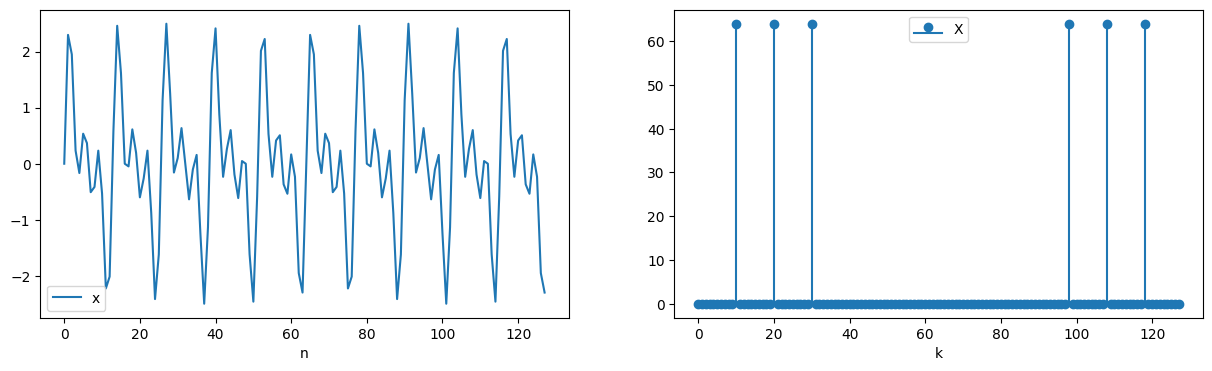

In [2]:
N=128
n=arange(N)
x1=sin(10*2*pi*n/N)
x2=sin(20*2*pi*n/N)
x3=sin(30*2*pi*n/N)
x=x1 + x2 + x3

figure(figsize=(15,4))
subplot(1,2,1)
plot(x,label='x')
legend()
xlabel('n')
subplot(1,2,2)
stem(abs(fft(x)),basefmt='C0', label='X')
legend()
xlabel('k')
show()

2) Projete um filtro FIR de ordem 9 para deixar passar somente a senoide central, usando a função signal.firwin().

In [3]:
b_fir = signal.firwin(9, [7.5/32, 12.5/32], pass_zero=False)

3) Projete um filtro IIR de ordem 9, semelhante ao anterior, usando a função signal.butter()


In [4]:
b_iir, a_iir = signal.butter(9, [7.5/32, 12.5/32], 'bandpass')

4) Plote o espectro do sinal X juntamente com as respostas em frequência dos dois filtros.


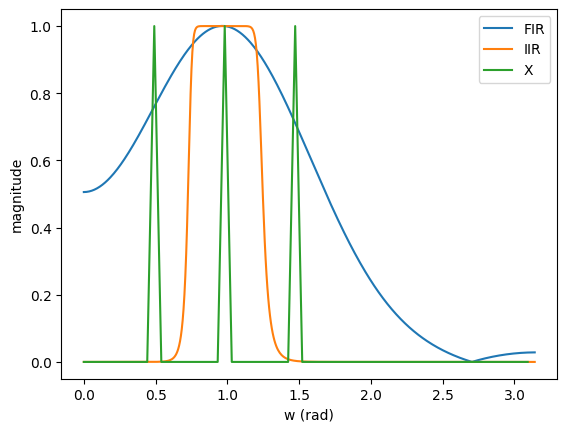

In [5]:
w1, FIR = signal.freqz(b_fir, 1)
w2, IIR = signal.freqz(b_iir, a_iir)
X = fft(x)[:len(fft(x))//2]

plot(linspace(0, pi, num=len(FIR)), abs(FIR), label = 'FIR')
plot(linspace(0, pi, num=len(IIR)), abs(IIR), label = 'IIR')
plot(linspace(0, pi, num=len(abs(X)), endpoint=False), abs(X)/max(abs(X)), label = 'X')
xlabel('w (rad)')
ylabel('magnitude')
legend()
show()


5) Filtre o sinal pelos com cada filtro, e plote no mesmo eixo os dois sinais filtrados.


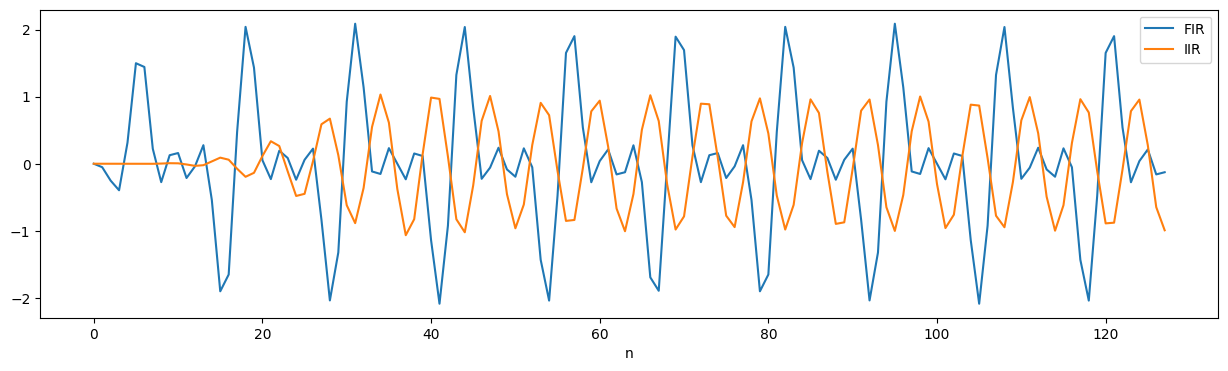

In [6]:
figure(figsize=(15.2,4))
plot(signal.lfilter(b_fir, 1, x), label = 'FIR')
plot(signal.lfilter(b_iir, a_iir, x), label = 'IIR')
xlabel('n')
legend()
show()

6) qual dos dois filtros rejeitou melhor as frequencias baixa e alta ?


<b>R:</b> O filtro IIR rejeitou de forma mais eficiente as frequências altas e baixas, visto que somente apresenta um impulso na frequência central. 

7) Plote no mesmo eixo a resposta em frequencia dos filtro FIR obtida de duas formas:<br>
a) freqz() <br>
b) T.F. da resposta ao impulso. (obs.: lembre que os proprios coeficiente do filtro são a resposta ao impulso. Pode completar a resposta com mais 60 zeros).

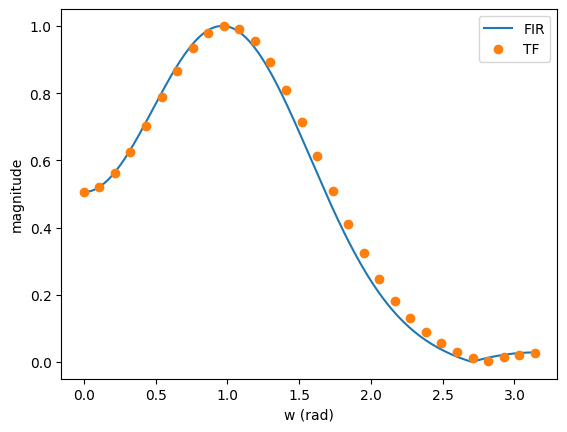

In [7]:
w, FIR = signal.freqz(b_fir, 1)
tf = concatenate((b_fir, zeros(60-len(b_fir))))
TF = fft(tf)[:len(fft(tf))//2]

plot(linspace(0, pi, len(abs(FIR))), abs(FIR), label = 'FIR')
plot(linspace(0, pi, len(abs(TF))), abs(TF), 'o', label = 'TF')
xlabel('w (rad)')
ylabel('magnitude')
legend()
show()